In [16]:
import pylab
import pymoc
import xidplus
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
from astropy import wcs
from astropy.table import Table
import pandas as pd


## Read tables

In [3]:
cat=Table.read('data/changed_psf/3/dmu26_XID+MIPS_HDF-N_cat.fits')

## Look at Symmetry of PDFs to determine depth level of catalogue

2.7446556


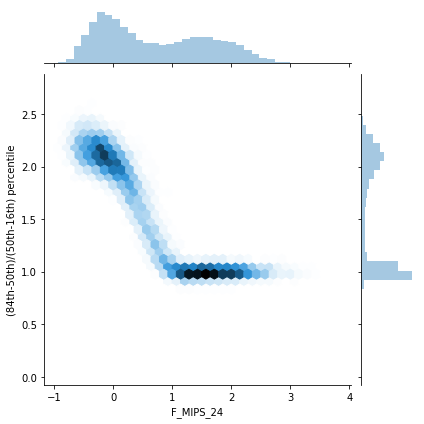

In [4]:
import seaborn as sns
skew=(cat['FErr_MIPS_24_u']-cat['F_MIPS_24'])/(cat['F_MIPS_24']-cat['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5
g=sns.jointplot(x=np.log10(cat['F_MIPS_24'][use]),y=skew[use], kind='hex')
print(np.max(skew[use]))


Both seem to have flux pdfs that become Gaussian at ~7$\mathrm{\mu Jy}$ 

In [8]:
10**0.85

7.079457843841379

## Add flag to catalogue

In [9]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_mips_24'))


In [10]:
ind=(cat['Pval_res_24']>0.5) | (cat['F_MIPS_24'] < 7.0)

In [11]:
cat['flag_mips_24'][ind]=True


In [12]:
cat.write('./data/changed_psf/3/dmu26_XID+MIPS_HDF-N_cat_20190930.fits', format='fits',overwrite=True)

### Check Map


In [13]:
from astropy.io import fits
import pylab as plt

In [14]:
MIPS_pval1=fits.open('./data/prev/dmu26_XID+MIPS_HDF-N_Bayes_Pval.fits')
MIPS_pval2=fits.open('./data/changed_psf/3/dmu26_XID+MIPS_HDF-N_Bayes_Pval.fits')


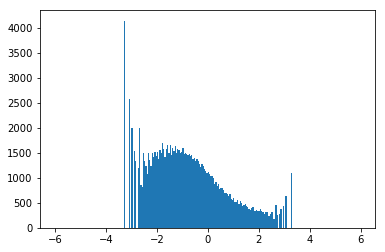

In [17]:
plt.hist(MIPS_pval1[1].data[np.isfinite(MIPS_pval1[1].data)],bins=np.arange(-6,6,0.05));

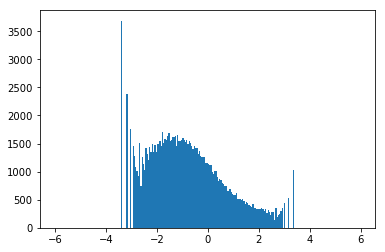

In [18]:
plt.hist(MIPS_pval2[1].data[np.isfinite(MIPS_pval2[1].data)],bins=np.arange(-6,6,0.05));

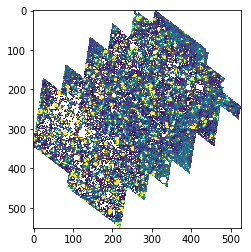

In [19]:
plt.imshow(MIPS_pval1[1].data)

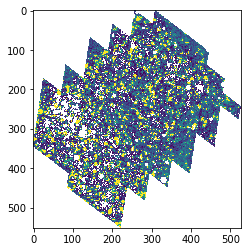

In [20]:
plt.imshow(MIPS_pval2[1].data)

In [21]:
import seaborn as sns
import aplpy

keyword looks very much like CRVALia but isn't. [astropy.wcs.wcs]
keyword looks very much like CRVALia but isn't. [astropy.wcs.wcs]


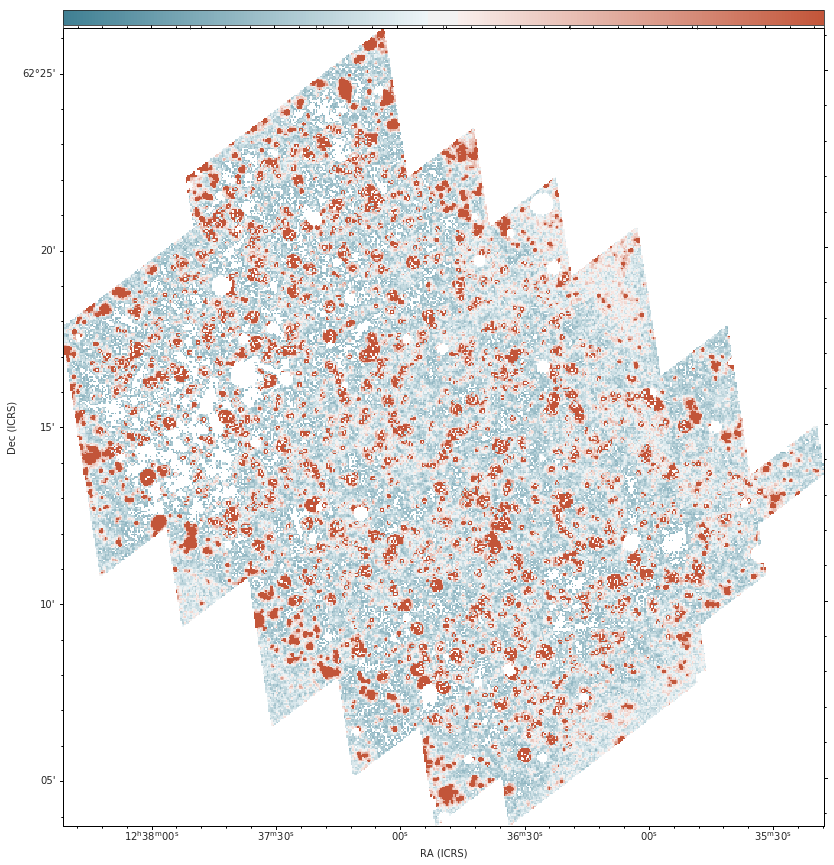

In [24]:
sns.set_style("white")
cmap = sns.diverging_palette(220, 20, as_cmap=True)

fig = plt.figure(figsize=(20, 15))
Bayes_p_map=aplpy.FITSFigure('./data/changed_psf/3/dmu26_XID+MIPS_HDF-N_Bayes_Pval.fits', figure=fig)
Bayes_p_map.show_colorscale(vmin=-6, vmax=6, cmap=cmap)
Bayes_p_map.add_colorbar()
Bayes_p_map.colorbar.set_location('top')